Exploratory Data Analysis
-----

In [1]:
import pandas as pd
df = pd.read_csv('data/data.csv', header=0, sep='|')
df['month'] = pd.to_datetime(df.day).apply(lambda x: x.month)
df.sample(10)

,hits,visits,day,identifier,orders,amount,product_pages,direct_visit,organic_visit,paid_search_visit,email_visit,month
944,1332917,242135,2019-07-07,15,4273,4.911194e+05,340338,176821,61739,128055,12923,7
1414,886569,215992,2019-05-07,45,2,NaN,159256,94515,49887,53271,1,5
2519,74341,11076,2020-04-17,13,2,6.700000e+01,22711,14180,2876,3,5386,4
3127,5873757,1039175,2019-11-30,36,108461,2.793596e+07,1705749,799279,376903,279768,63572,11
2136,2535621,408526,2019-11-16,3,87921,5.082992e+06,767352,437330,242746,54080,18255,11
1254,749873,167326,2019-09-17,45,15594,8.558994e+05,242292,140996,46504,71686,9,9
985,1841577,336248,2020-04-13,15,6180,8.416218e+05,439111,255825,96789,168688,310,4
955,768988,172294,2019-08-09,15,2528,2.813913e+05,195759,102317,36356,68504,4207,8
1470,944363,200412,2020-03-08,45,12642,7.950899e+05,284060,166402,73896,84275,4,3
1740,536107,60657,2019-08-26,34,53119,1.245944e+06,53419,21040,784,14039,241,8


### pandas

In [2]:
pd.crosstab(df.identifier,df.month)

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,31,29,31,45,45,30,31,31,30,31,30,31
13,31,29,29,45,45,30,31,31,30,31,30,31
15,31,29,31,45,45,30,31,31,30,31,30,31
34,31,29,31,45,45,30,31,31,30,31,30,31
36,31,29,31,45,45,30,31,31,30,31,30,31
43,31,29,31,45,45,30,31,31,30,31,30,31
45,31,29,31,45,45,30,31,31,30,31,30,31
96,31,29,31,46,44,30,31,31,30,31,30,31


In [3]:
pd.crosstab(df.identifier,df.month,values=df.orders,aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,1537804,1115207,537063,944001,1989665,1893833,2138844,2342568,1671820,1728354,1415685,1742942
13,21404,12175,5039,11596,22160,19164,25010,15877,14592,15412,15863,24335
15,143635,69290,76481,184474,135676,98052,123463,99682,84511,96938,213427,212164
34,3410034,2487020,1448832,790800,1670782,1757408,2118461,2278508,3666545,4438554,3131970,4819781
36,1138112,918047,540233,755756,1213836,905395,988140,948665,901377,906692,1229129,1826970
43,785840,514178,262542,325060,580669,246632,198723,547917,429992,457481,434128,563670
45,1199883,1107405,633747,203965,1005816,1249791,1332822,785510,610123,934471,1368915,2036568
96,1262002,1370017,729789,1597190,2517278,1592140,1660732,1641217,1348459,1541647,1385466,1261921


In [4]:
df.pivot_table(index='identifier',columns='month',values='orders', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,1537804,1115207,537063,944001,1989665,1893833,2138844,2342568,1671820,1728354,1415685,1742942
13,21404,12175,5039,11596,22160,19164,25010,15877,14592,15412,15863,24335
15,143635,69290,76481,184474,135676,98052,123463,99682,84511,96938,213427,212164
34,3410034,2487020,1448832,790800,1670782,1757408,2118461,2278508,3666545,4438554,3131970,4819781
36,1138112,918047,540233,755756,1213836,905395,988140,948665,901377,906692,1229129,1826970
43,785840,514178,262542,325060,580669,246632,198723,547917,429992,457481,434128,563670
45,1199883,1107405,633747,203965,1005816,1249791,1332822,785510,610123,934471,1368915,2036568
96,1262002,1370017,729789,1597190,2517278,1592140,1660732,1641217,1348459,1541647,1385466,1261921


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

### data visualization

In [6]:
from datetime import date, datetime
import calendar
import pandas as pd
import numpy as np
%matplotlib inline

def addNone(data, hubIdName, variableName, dateName, datestr_format='%Y-%m-%d'):
    dataAll = pd.DataFrame()
    for hubId in data[hubIdName].unique():
        dataset = data[data[hubIdName]==hubId]
        start_date = datetime.strptime(dataset[dateName].min(), datestr_format)
        end_date = datetime.strptime(dataset[dateName].max(), datestr_format)
        if (dataset.shape[0]<(end_date-start_date).days+1): # MISSING DATA FOR ID
            days = pd.date_range(start_date, end_date, freq='D').astype(str)
            dataImputed = pd.DataFrame({hubIdName : hubId, dateName : days, variableName : None})
            ind = np.where(np.in1d(dataImputed[dateName], dataset[dateName].astype(str)))
            dataImputed[variableName].iloc[ind] = dataset[variableName].tolist()
            dataImputed[dateName] = dataImputed[dateName].astype('datetime64[ns]')
            dataset = dataImputed
        dataAll = pd.concat([dataAll, dataset])
    return dataAll.reset_index(drop=True)

def addCalendar(data, dateName):
    data[dateName] = pd.to_datetime(data[dateName])
    data["week"] = data[dateName].apply(lambda x: x.isocalendar()[1])
    data["month"] = data[dateName].apply(lambda x: x.month)
    data["year"] = data[dateName].apply(lambda x: str(x.year))
    data[dateName] = data[dateName].astype(str)
    data[dateName] = data[dateName].apply(lambda x : x[0:10])    
    return data

def computeAggValues(data, hubTest, timeUnit, hubIdName, variableName, fn="mean"):

    dataOthers = data[data[hubIdName] != hubTest]
    dataHubTest = data[data[hubIdName] == hubTest].reset_index(drop=True)
    dataAgg = pd.DataFrame()

    var = ['year', timeUnit]
    tmp = variableName
    
    if fn=="mean":
        dataTest = dataHubTest.groupby(var)[tmp].agg(lambda x: pd.to_numeric(x).mean()).reset_index(drop=True)

        dataAgg["Mean"] = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).mean())
        dataAgg["Med"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).median())
        dataAgg["q75"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.25))
        dataAgg["q25"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.75))

    else:
        dataTest = dataHubTest.groupby(var)[tmp].agg(lambda x: pd.to_numeric(x).sum()).reset_index(drop=True)

        dataAgg["Mean"] = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).mean())
        dataAgg["Med"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).median())
        dataAgg["q75"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.25))
        dataAgg["q25"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.75))

    dataAgg.reset_index(drop=False, inplace=True)    
    
    return dataTest, dataAgg

In [7]:
import matplotlib.pyplot as plt
def myplot(dataHubTest, dataAgg, timeUnit, variableName, yMin=None, yMax=None):

    xticks_step = 14 if timeUnit == "day" else 1

    plt.figure(figsize=(20,10))
    
    plt.plot(dataHubTest, color = 'coral', linewidth=2.5, label = 'Vous')
    plt.plot(dataAgg["Med"], '--', color = 'darkcyan', linewidth=2.5, label = 'median', alpha=0.8)
    plt.plot(dataAgg["q25"], '--', color = 'darkcyan', linewidth=1.5, label = '25%', alpha=0.8)
    plt.plot(dataAgg["q75"], '--', color = 'darkcyan', linewidth=1.5, label = '75%', alpha=0.8)
    plt.fill_between(np.arange(len(dataAgg)), dataAgg["q25"], dataAgg["q75"], color = "powderblue", alpha=0.5)

    var = timeUnit
    plt.xticks(np.arange(0,len(dataAgg),xticks_step), dataAgg[var][np.arange(0,len(dataAgg),xticks_step)], rotation=90)
    plt.yticks(fontsize=20)
    plt.xlabel("\n "+timeUnit, fontsize=20)
    plt.ylabel("\n", fontsize=20)
    plt.xlim(0,len(dataAgg)-1)
    plt.ylim(yMin, yMax) if yMin or yMax else None
    plt.legend(loc = 0, prop={'size': 15})
    plt.grid(axis = "y", color = 'lightgray', alpha = 0.7)
    plt.title("{}".format(variableName), fontsize=25)
   
    return plt.show()

In [ ]:
hubIds = (96, 43, 15, 45, 34,  3, 13, 36)
data = df[df['identifier'].isin(hubIds)].reset_index(drop=True).copy()

hubIdName = "identifier"
dateName = "day"

variableName = 'visits/hits'
data[variableName] = data.visits/data.hits*100

data = addNone(data, hubIdName, variableName, dateName)
data = addCalendar(data, dateName)

timeUnit = "day" # month # week
hubTest = 36

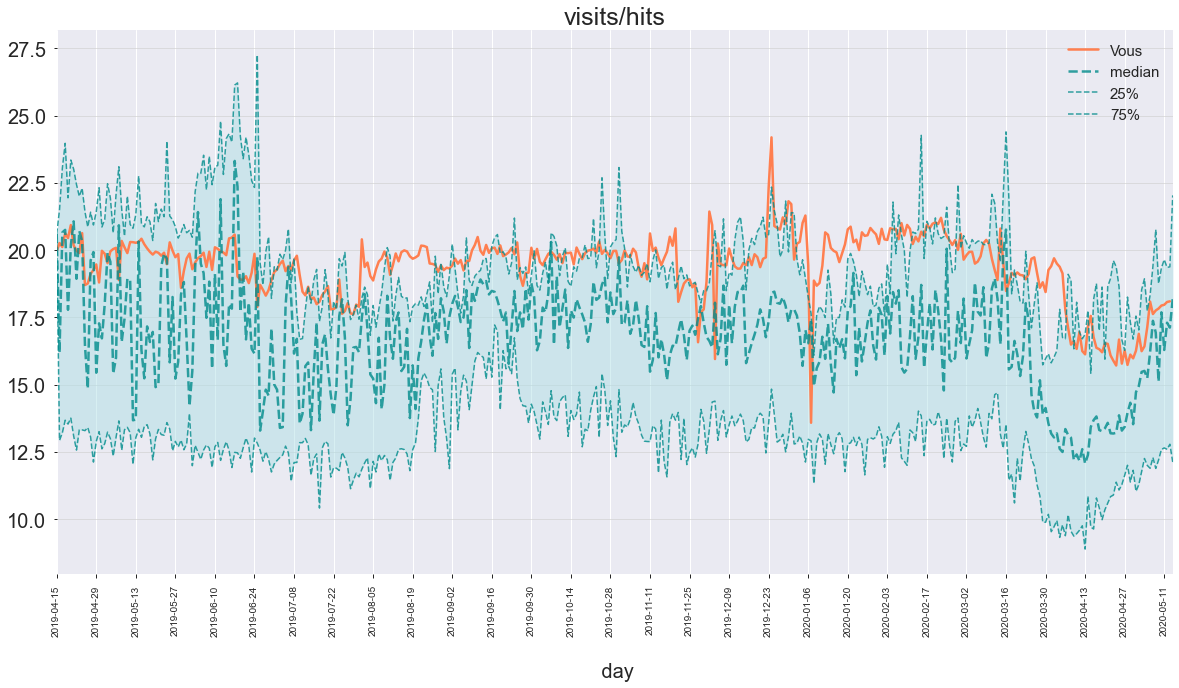

In [10]:
dataTest, dataAgg = computeAggValues(data, hubTest, timeUnit, hubIdName, variableName, fn="mean")
myplot(dataTest, dataAgg, timeUnit, variableName)

### D-TALE

In [11]:
import dtale

In [12]:
dtale.show(df, host='localhost')

<img src="data/dtale.png" />